In [ ]:
# Финальный проект по моделям машинного обучения с учителем
# Цель - спрогнозировать отток абонентов компании и попутно 
# исследовать данные на наличие другой полезной для компании информации

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [5]:
# В датасете множество категорийных переменных (да/нет)
# Перед отправлением в модель их необходимо конвертировать в dummy-переменные

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
# Отсутствующих значений нет

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

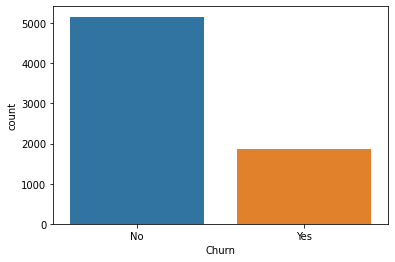

In [7]:
# Построим график CountPlot для проверки сбалансированности значений колонки Churn с классами
# Вывод: классы разбалансированны, это стоит учитывать при подведении оценочных метрик в моделях

sns.countplot(data=df,x='Churn')

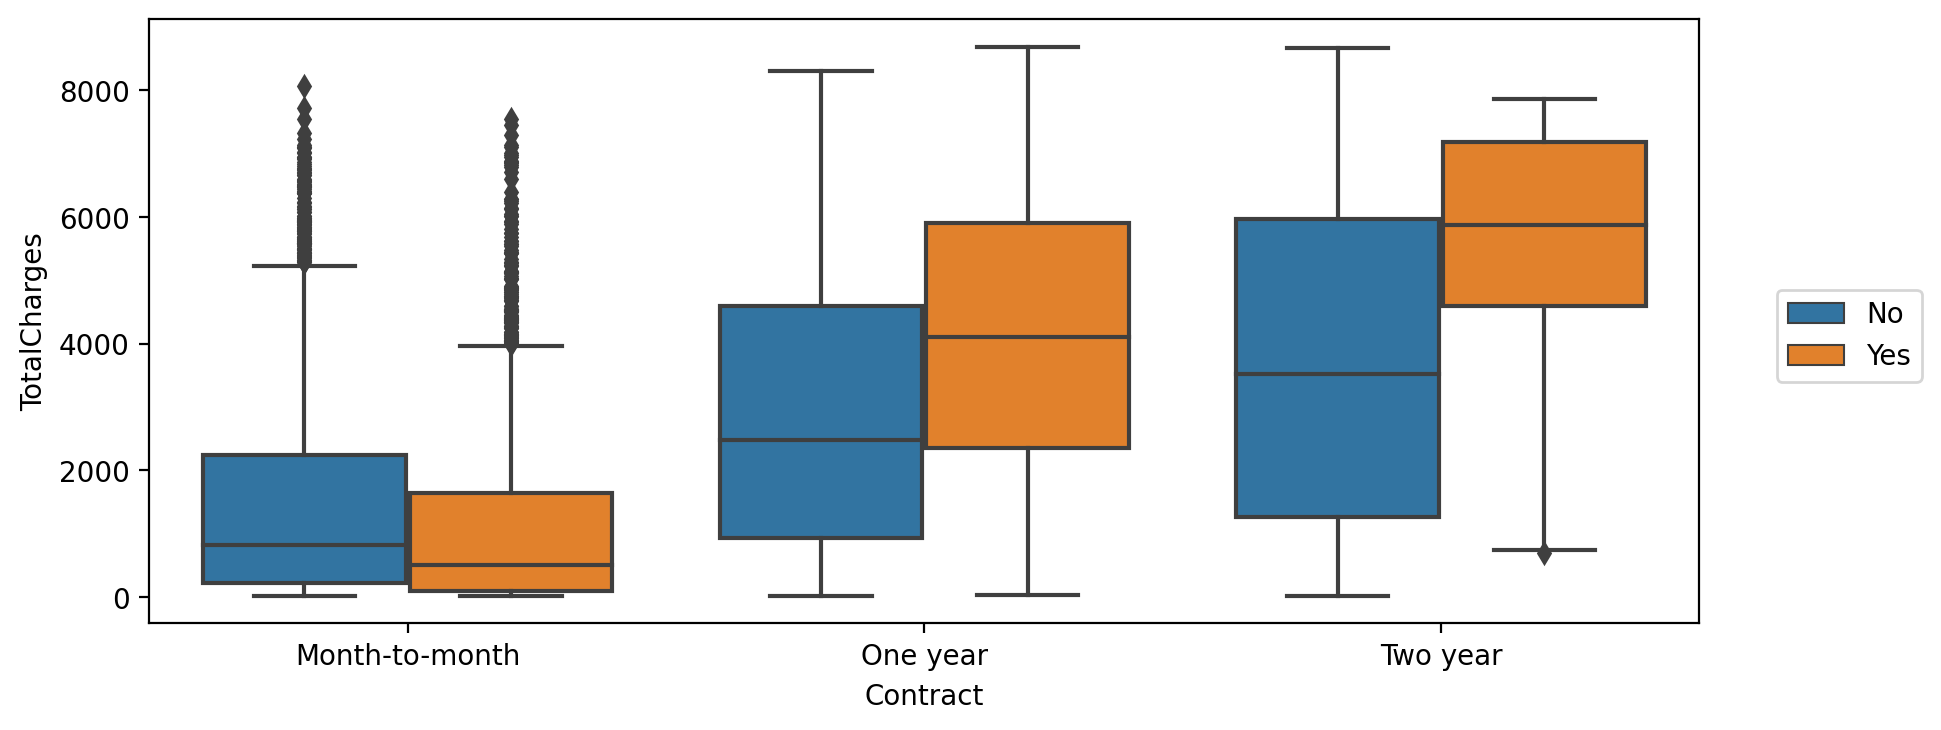

In [8]:
# Построим график boxplot с распределением колонки TotalCharges для различных типов контрактов, 
# + сделаем разбивку цветами по колонке Churn.
# 
# Выводы следующие: скорее всего, люди с контратами month-to-month заранее решают, что будут пользоваться
# услугами компании всего месяц, поэтому с оттоком в этой категории работать сложнее. У годовых и двухгодовых контрактов
# наблюдается интереская картина: те клиенты, которые платят больше, уходят чаще. Следовательно, нужно провести исследование 
# причин оттока клиентов, которые платят больше, возможно, дело в соотношении цена/качество услуг.

plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.05,0.4))

In [9]:
# Далее построим график barplot с корреляцией категориальных признаков с целевой переменной. 
# Категориальные признаки предварительно сконвертируем в дамми-переменные.

corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines',
                              'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                              'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','Churn']]).corr()

corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

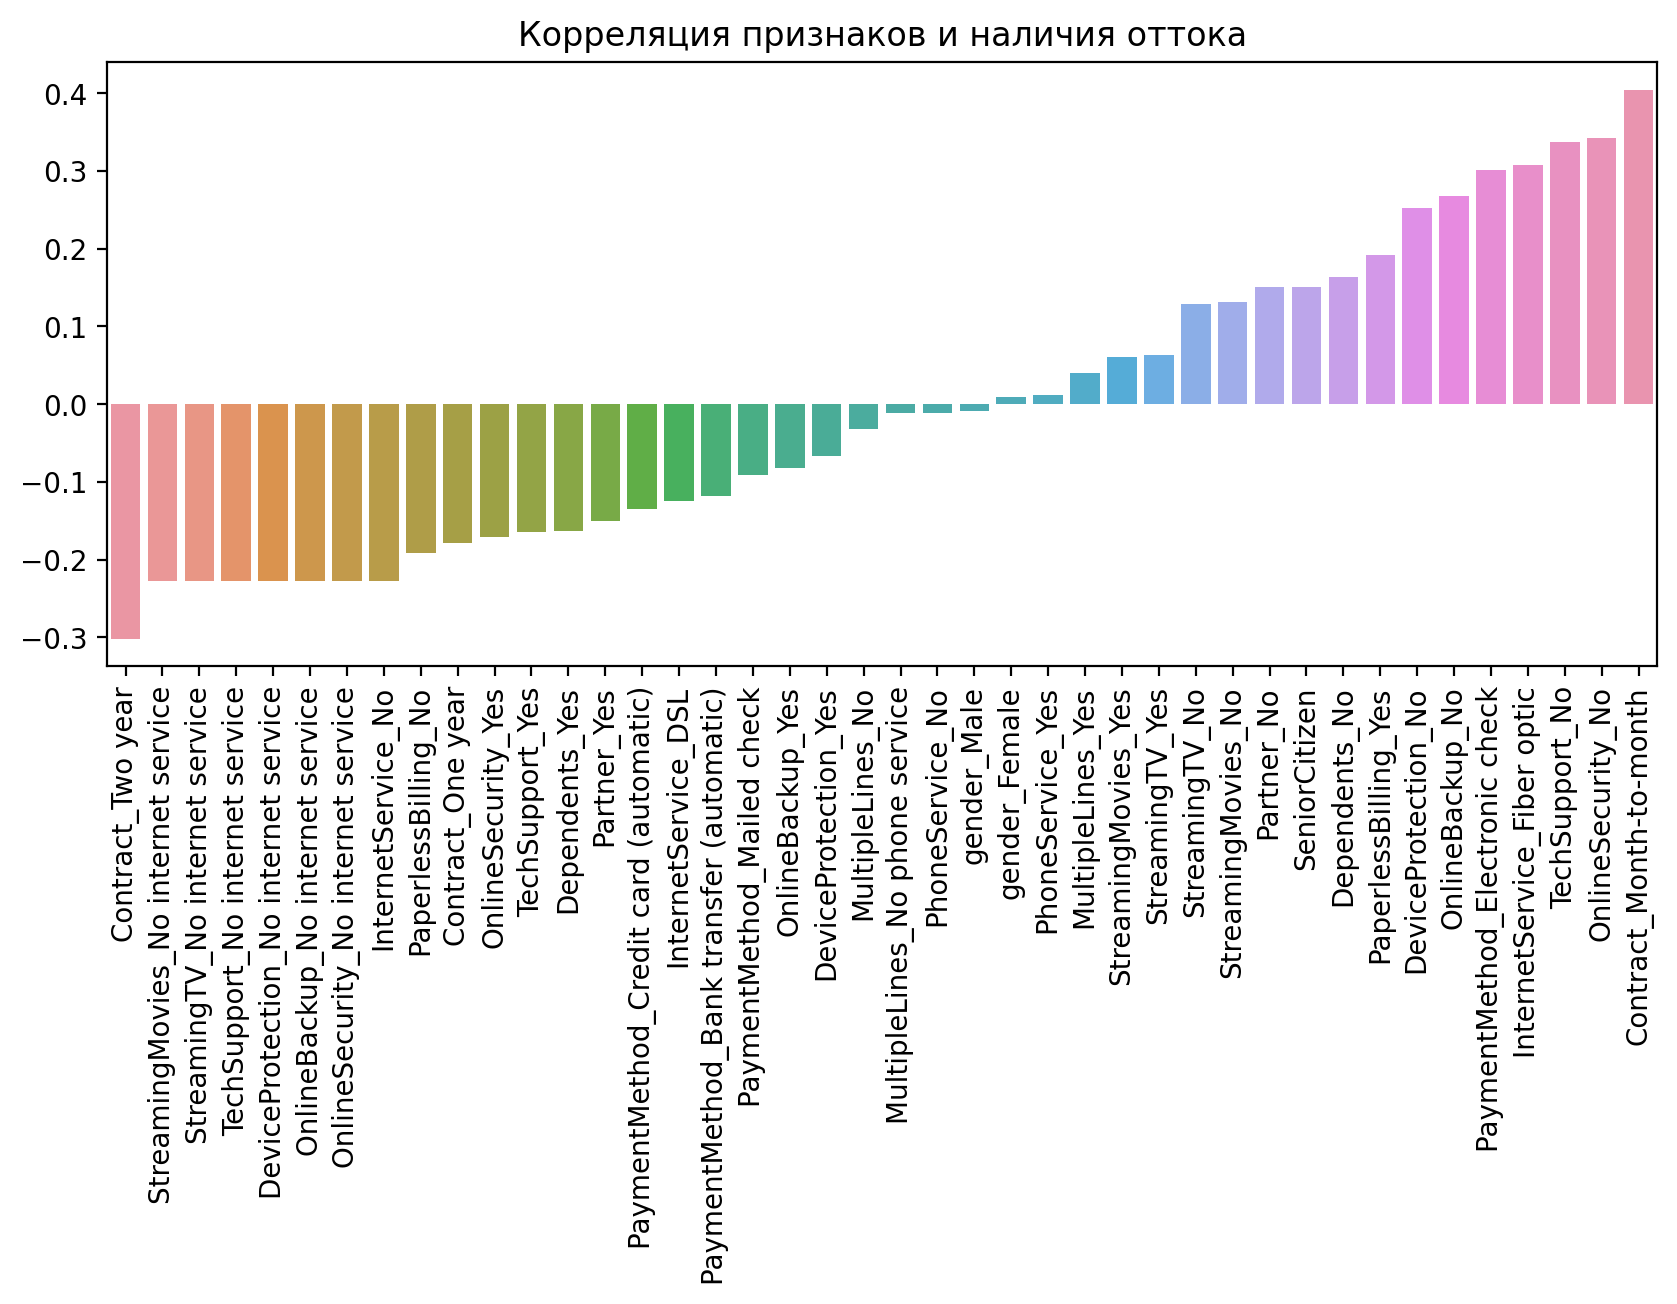

In [10]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title('Корреляция признаков и наличия оттока')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='tenure', ylabel='Count'>

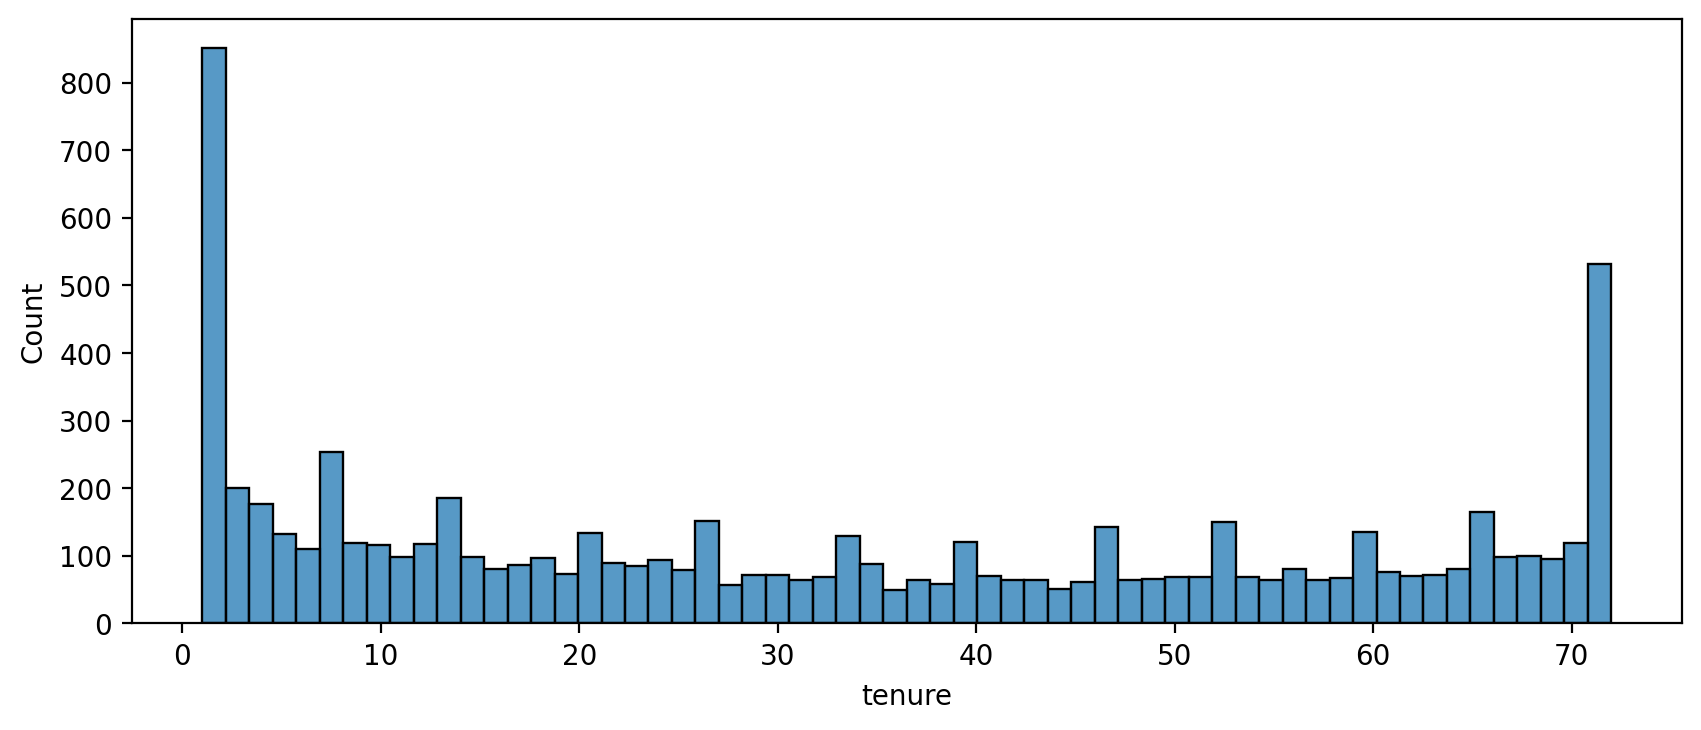

In [12]:
# Построим гистограмму с распределением значений колонки tenure - это количество месяцев,
# сколько времени человек является (или являлся) абонентом компании.
# По гистограмме можно сделать вывод, что значительное количество клиентов уходят после первого месяца (первый пик).
# Промежуточные пики, скорее всего, говорят о продлении годовых и двухгодичных контрактов, а правый пик показывает
# количество людей, которые до сих пор являются абонентами компании с её основания.

plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='tenure',bins=60)

<Figure size 2000x600 with 0 Axes>

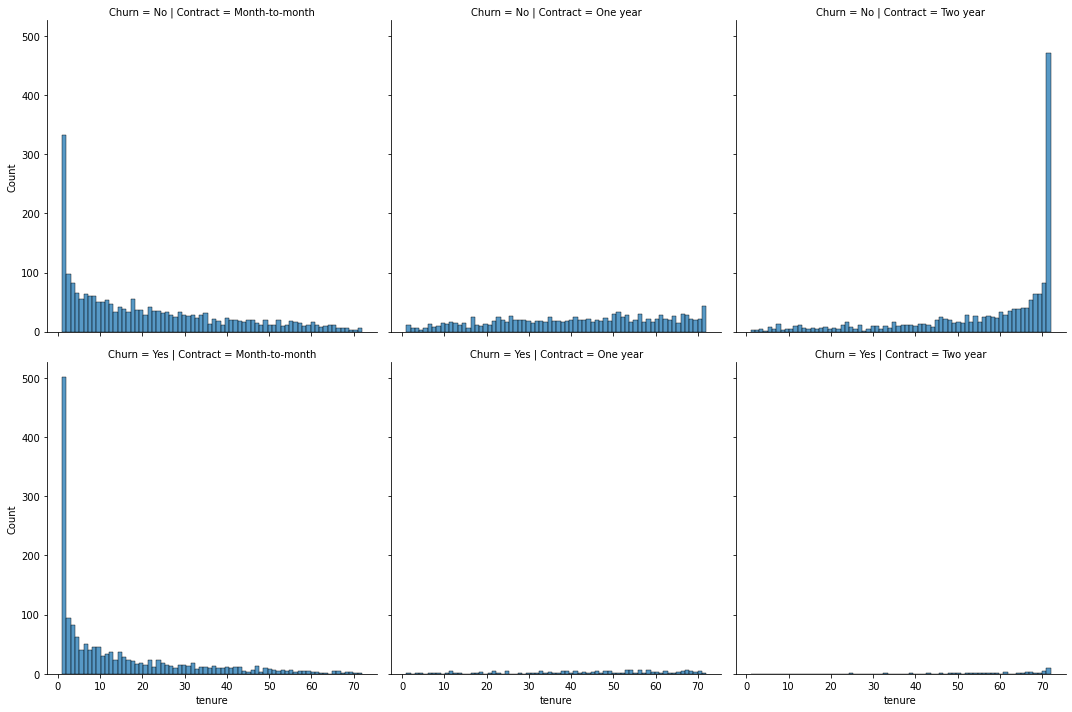

In [13]:
# Теперь построим графики по оттоку клиентов для разных типов контрактов.
# В верхнем ряду будут графики, где Churn = yes, внизу Churn = no
# Из графика следует, что для однолетних и двугодовых контрактов показатель оттока гораздо ниже,
# чем для контрактов month-to-month

plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

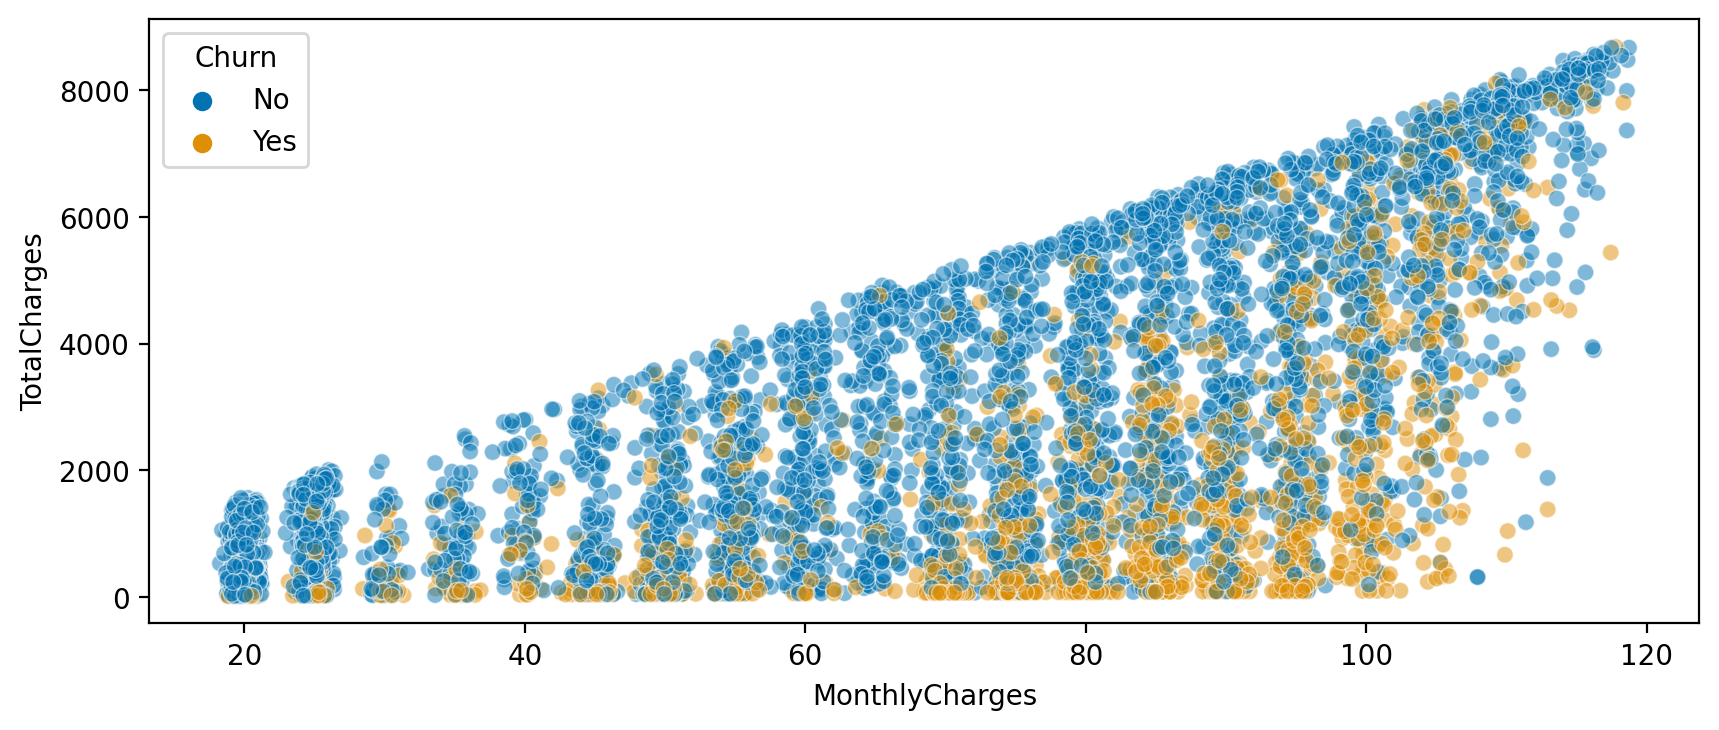

In [20]:
# На этом графике также видно, что в отток уходят, в основном, клиенты
# с высокими месячными расходами. Причем часто у таких клиентов низкое значение 
# общих расходов за весь период их статуса клиента. Это может означать, что клиенты
# с высокими месячными расходами чаще ищут конкурентов с более низкими ценами.

plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5,palette='colorblind')

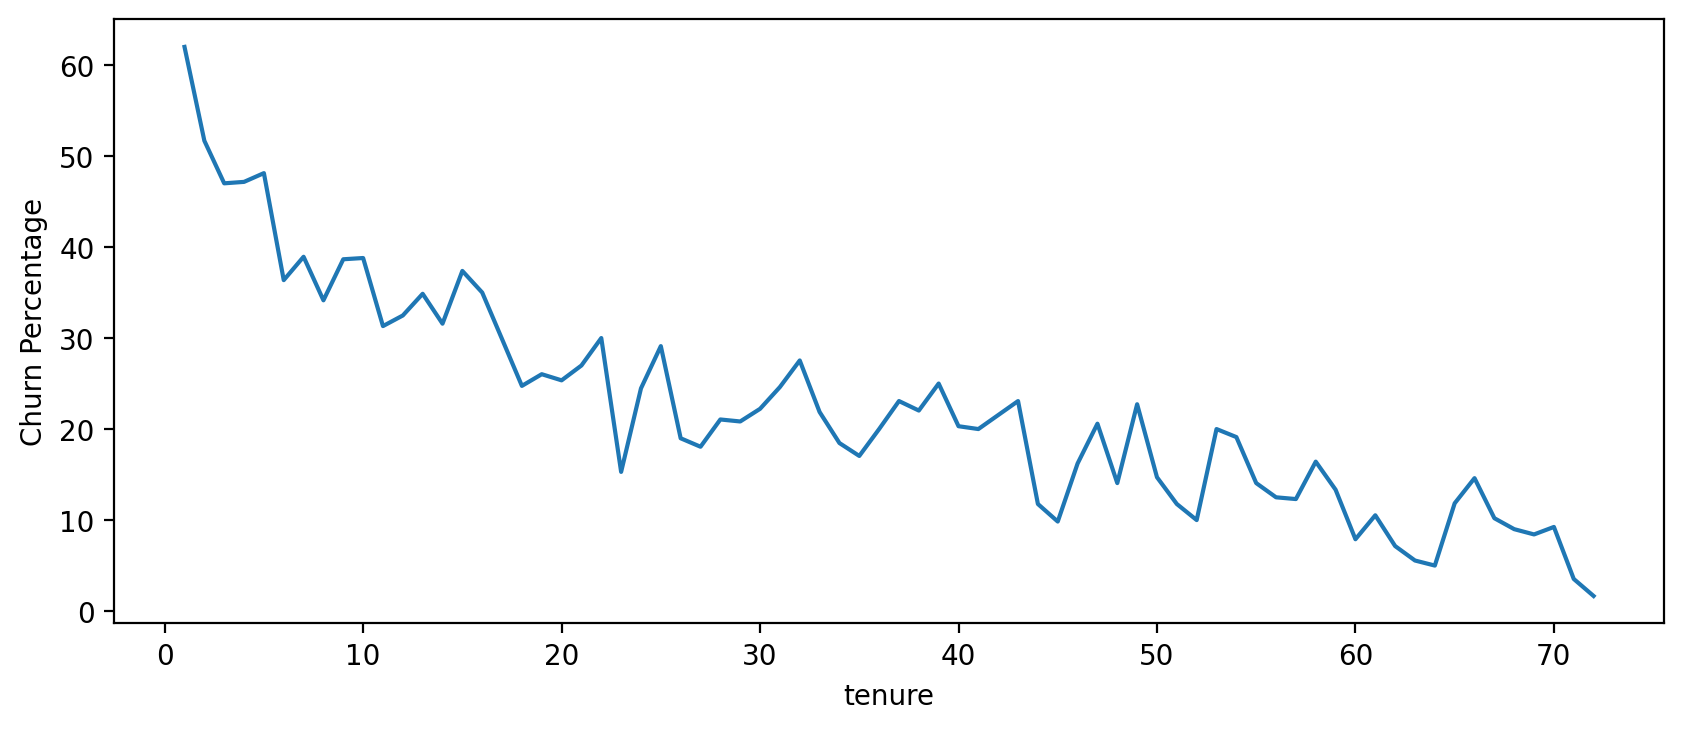

In [15]:
# Теперь построим график зависимости оттока от месяцев, проведенных в статусе клента.

no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']
churn_rate = 100 * yes_churn / (no_churn+yes_churn)
churn_rate.transpose()['customerID']

plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

In [21]:
# Теперь построим предиктивные модели на основе следующих алгоритмов:
# одно дерево решений, случайный лес, адаптивный бустинг и градиентный бустинг.
# Для начала разделим все данные на признаки X и целевую переменную Y, затем создадим дамми-переменные, 
# где это необходимо, а также удалим ненужные колонки перед отправкой данных в модели:

X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['Churn']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()


def model_testing(model):
    
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    

              precision    recall  f1-score   support

          No       0.86      0.79      0.82       557
         Yes       0.39      0.50      0.44       147

    accuracy                           0.73       704
   macro avg       0.62      0.65      0.63       704
weighted avg       0.76      0.73      0.74       704



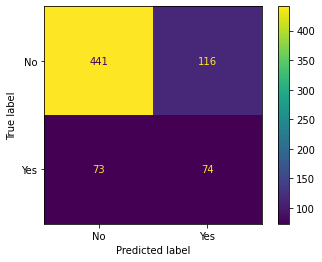

In [47]:
model_testing(tree_model)

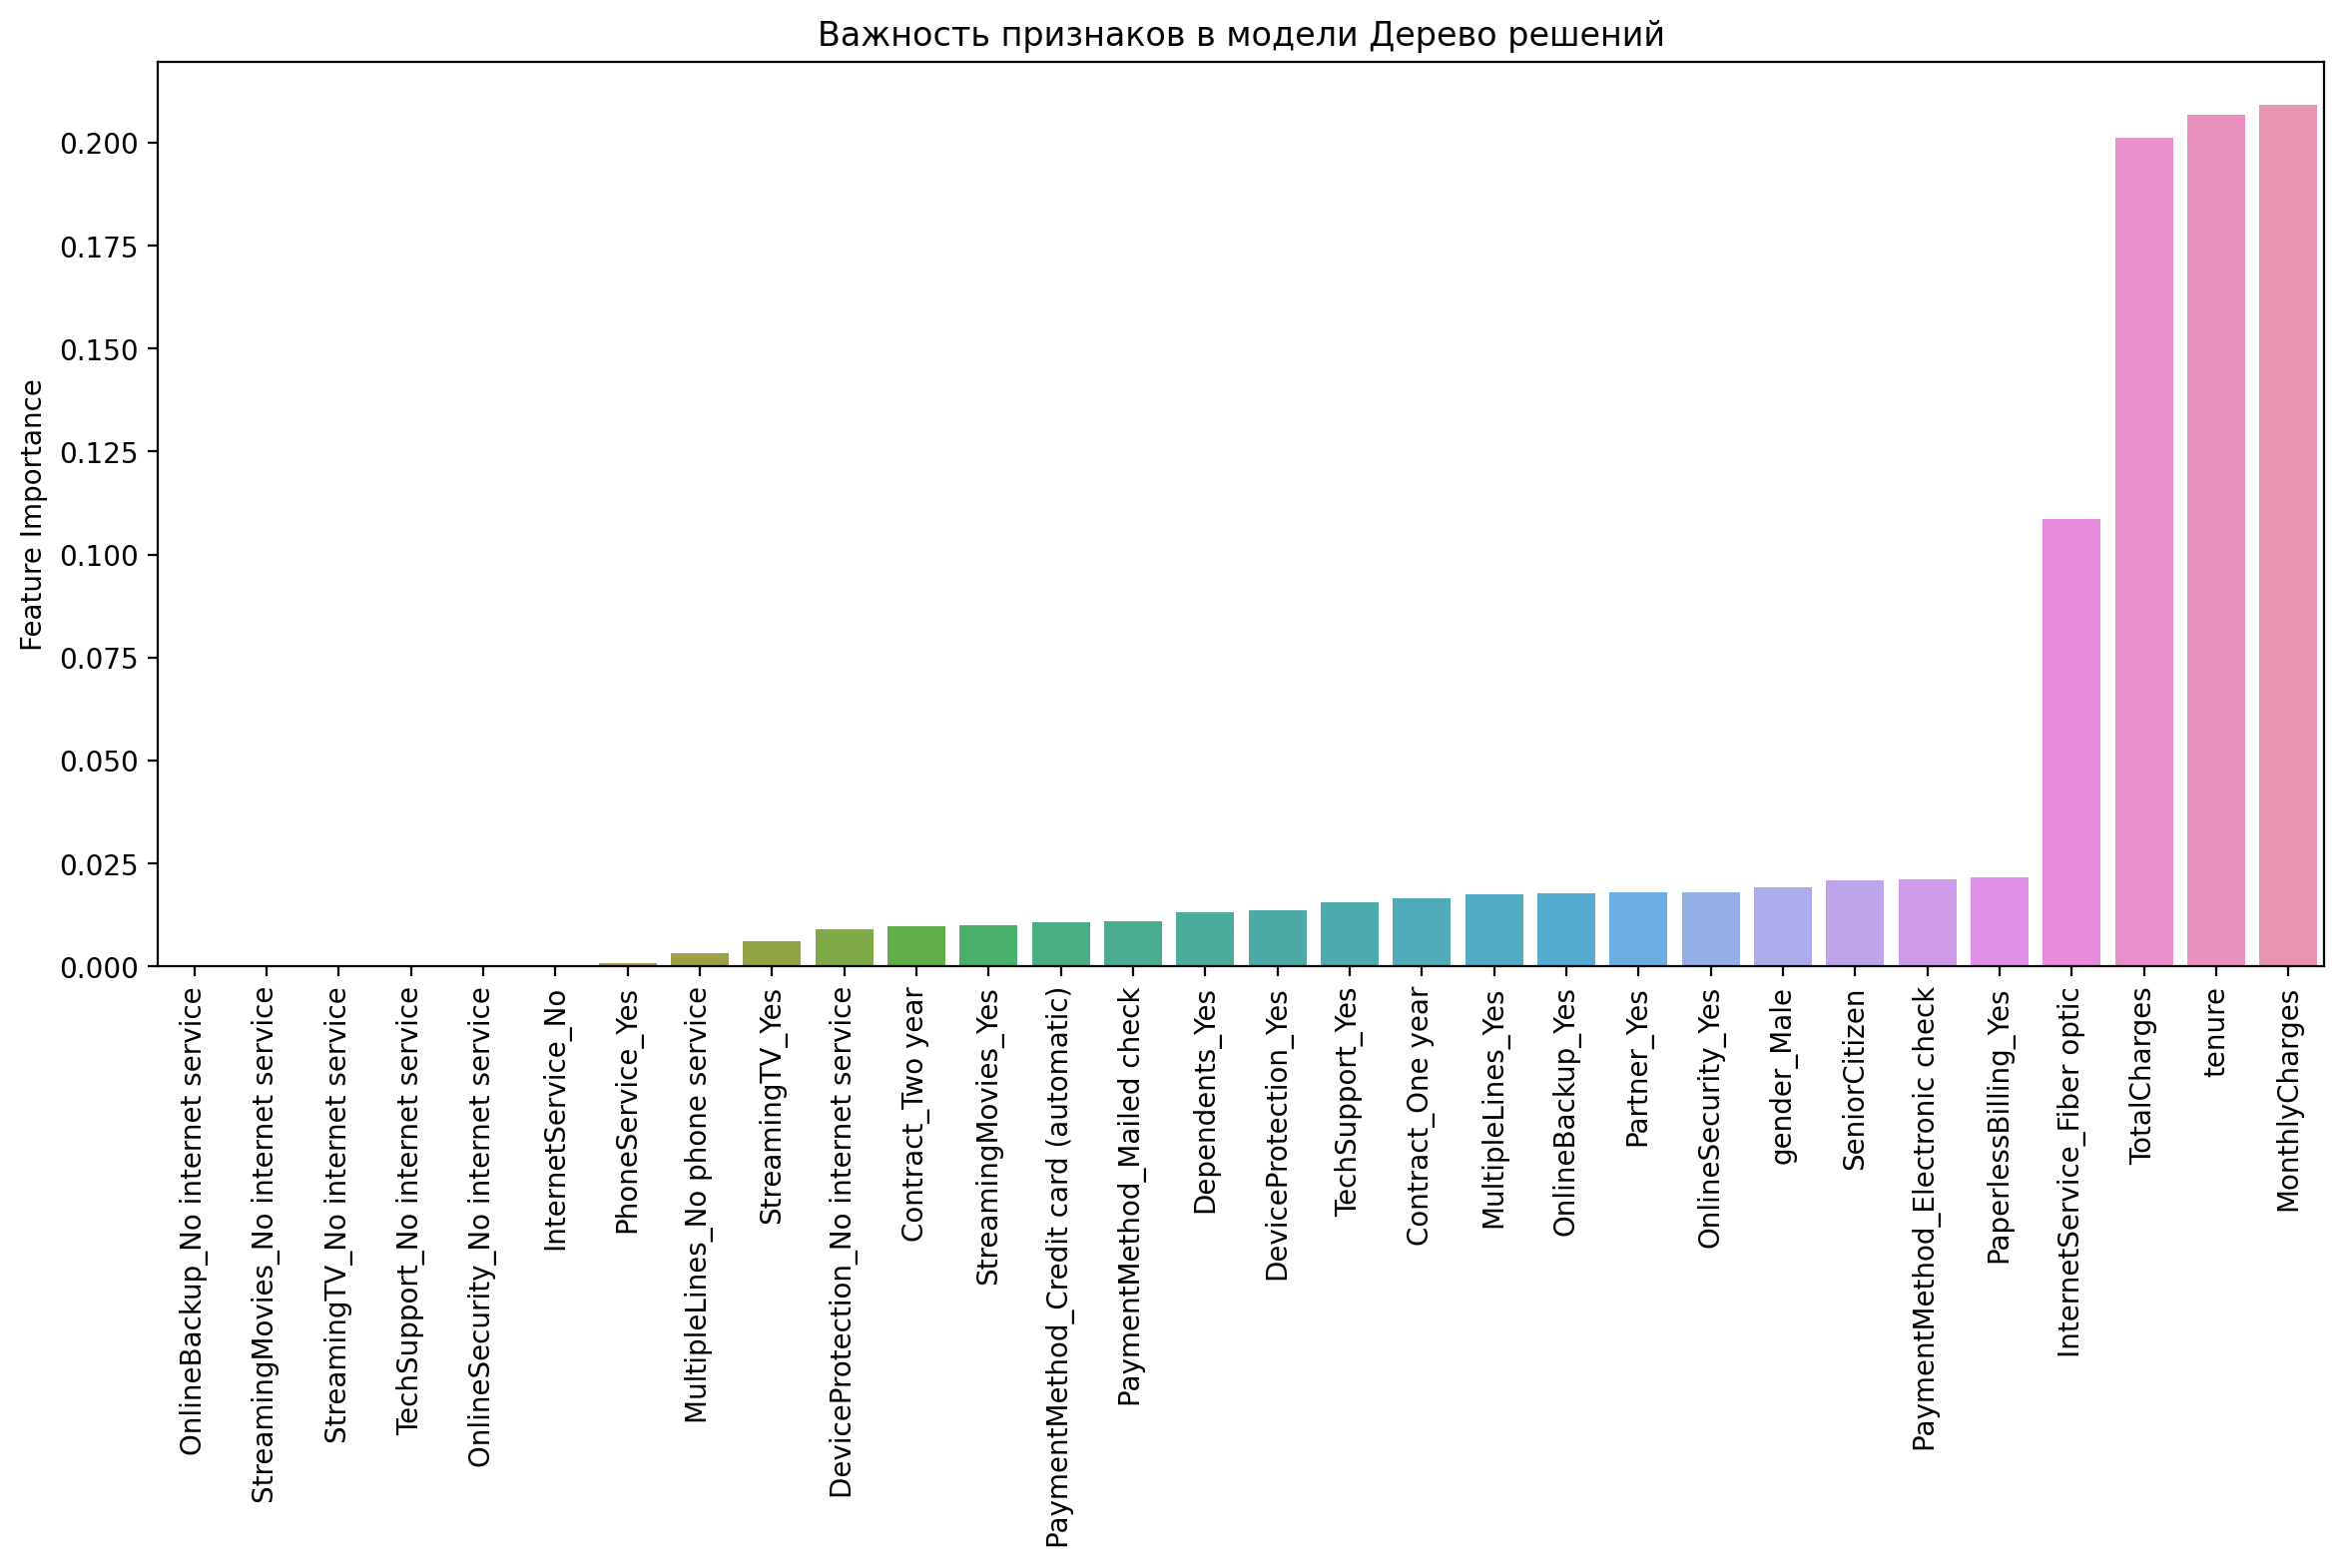

In [51]:
imp_feats = pd.DataFrame(data=tree_model.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Важность признаков в модели Дерево решений");

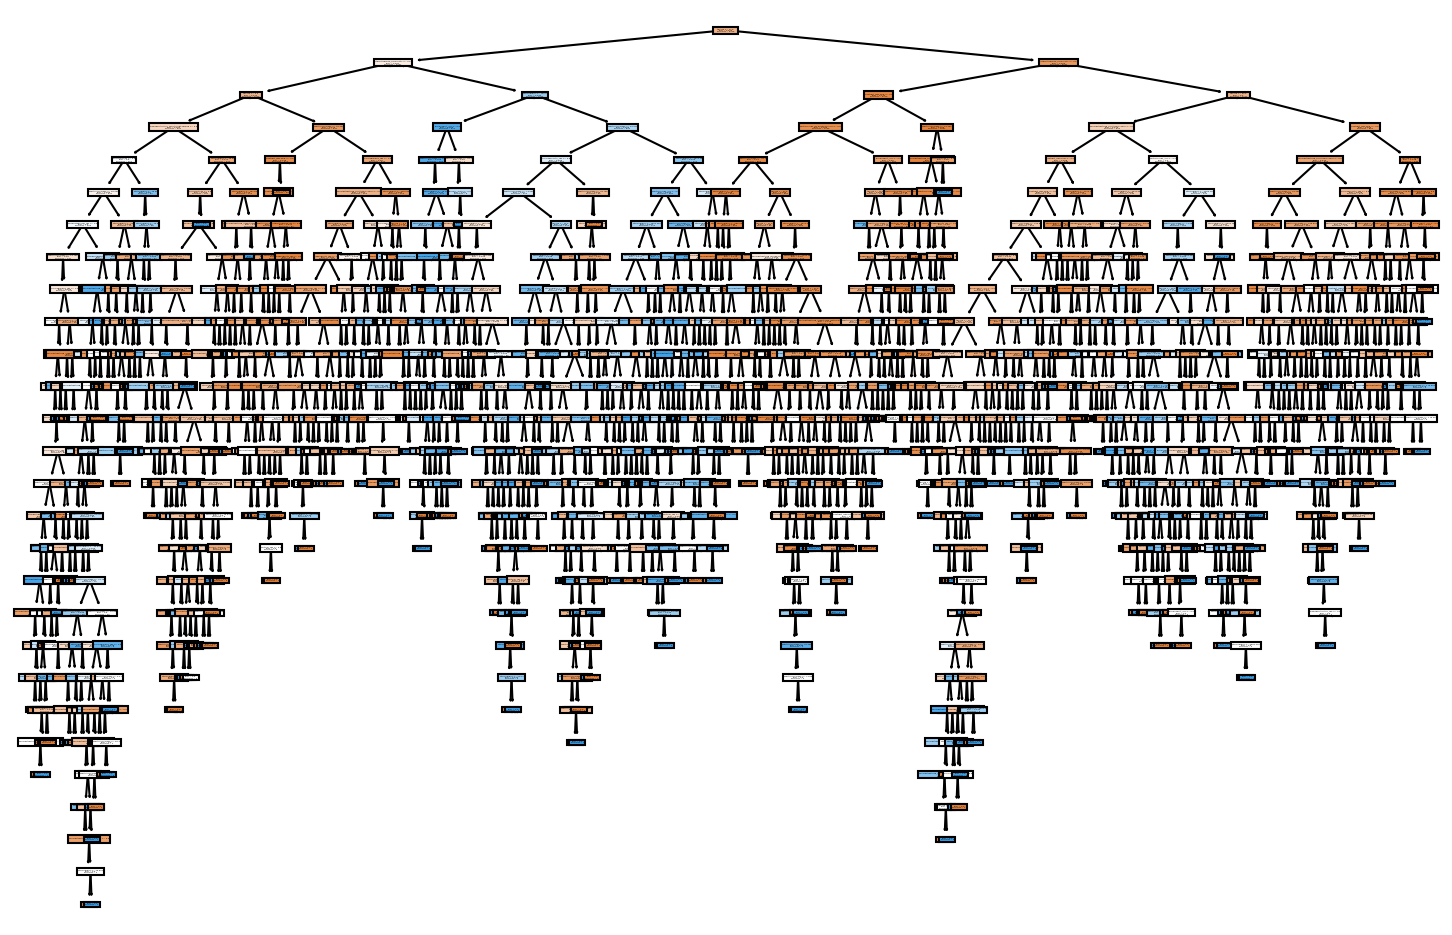

In [49]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8),dpi=150)
plot_tree(tree_model,filled=True,feature_names=X.columns);

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



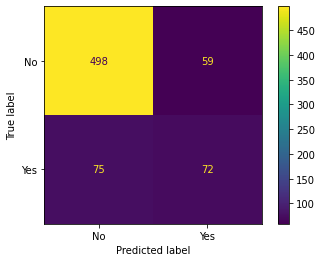

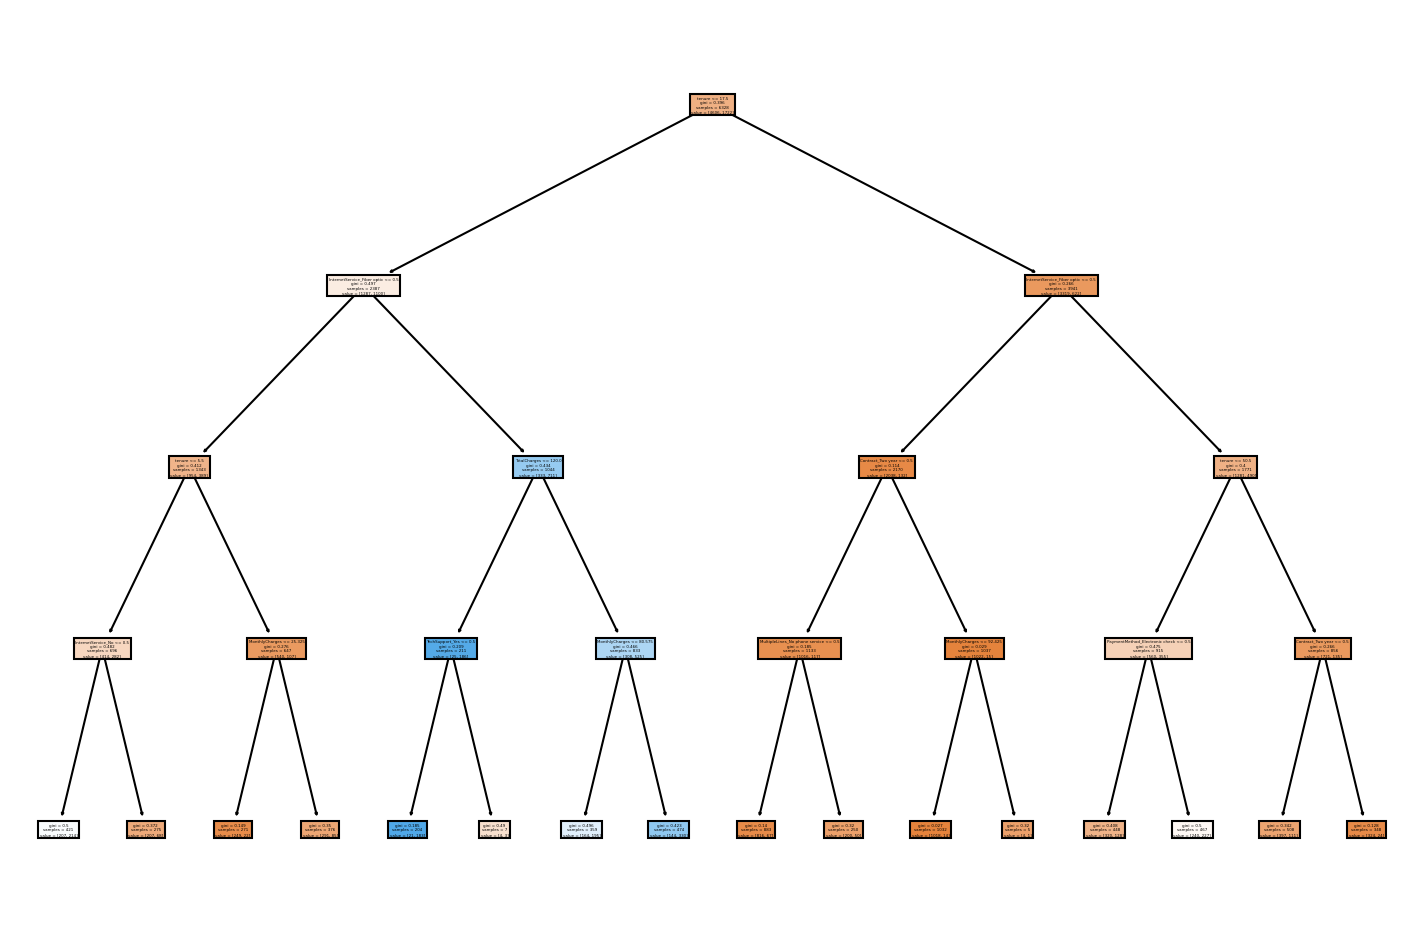

In [58]:
# Для модели без настрооенных гиперпараметров дерево выше выглядит очень запутанным и сложным. 
# Методом подбора (для экономии времени) выберем оптимальное значение max_depth=4
# при этом дерево значительно упростилось, а f1-score для обоих категорий увеличилось

tree_model_2 = DecisionTreeClassifier(max_depth=4)
model_testing(tree_model_2)

plt.figure(figsize=(12,8),dpi=150)
plot_tree(tree_model_2,filled=True,feature_names=X.columns);

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.50      0.44      0.47       147

    accuracy                           0.79       704
   macro avg       0.68      0.66      0.67       704
weighted avg       0.78      0.79      0.79       704



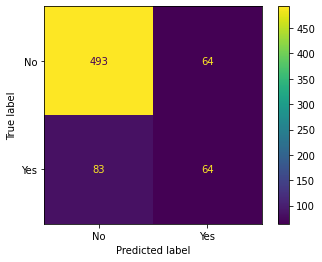

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

model_testing(rf_model)

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



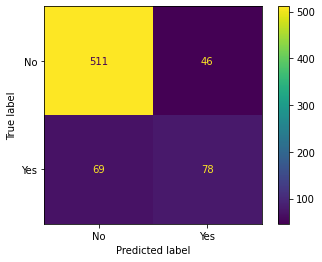

In [70]:
# для AdaBoost гипермараметр n_estimators подбирался вручную. В итоге -
# данная модель оказалась наиболее подходящей для наших данных согласно метрикам качества.

from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=100)

model_testing(ada_model)


              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



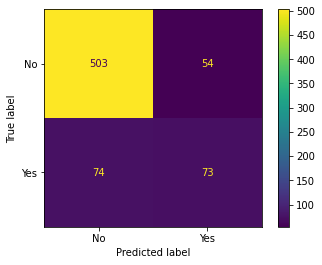

In [66]:
GB_model = GradientBoostingClassifier()

model_testing(GB_model)

In [73]:
# В качестве демонстрации, можем подобратьь гиперпараметры для последней модели 
# с помощью поиска по сетке. Результаты, тем не менее, остались такими же.

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50,100],
              'learning_rate':[0.1, 0.05, 0.2],
              'max_depth': [3,4,5]}

model = GradientBoostingClassifier()
grid_model = GridSearchCV(model, param_grid).fit(X_train, y_train)



In [74]:
grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

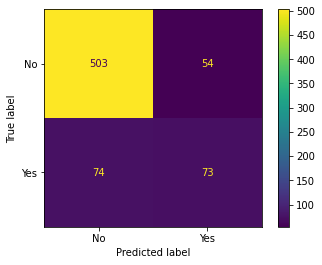

In [76]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)